# Information About Dataset:
#### This dataset consists of 614 loan applications, with 13 attributes describing each application. The columns include details such as the applicant's gender, marital status, education level, employment status, income, and loan-related information like the loan amount, loan term, credit history, and property area. The target variable, Loan_Status, indicates whether a loan was approved (Y) or not (N)

# Importing all required libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import joblib

#### Reading the dataset and dropping the Loan_ID column as it is not required 

In [2]:
data = pd.read_csv("D:\Intern\Dlytica Data Analytics and AI\Loan_Status\Loan Data\loan_approval.csv")
data.drop('Loan_ID', inplace=True, axis=1)

##### Viewing first five rows

In [3]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### Checking shape of the dataset

In [4]:
data.shape

(614, 12)

##### Information about the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


##### Checking number of unique values in each column

In [6]:
data.apply(lambda x : x.nunique())

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

##### Checking for missing values in the each column

In [7]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### Visualizing the missing values in each column using heatmap

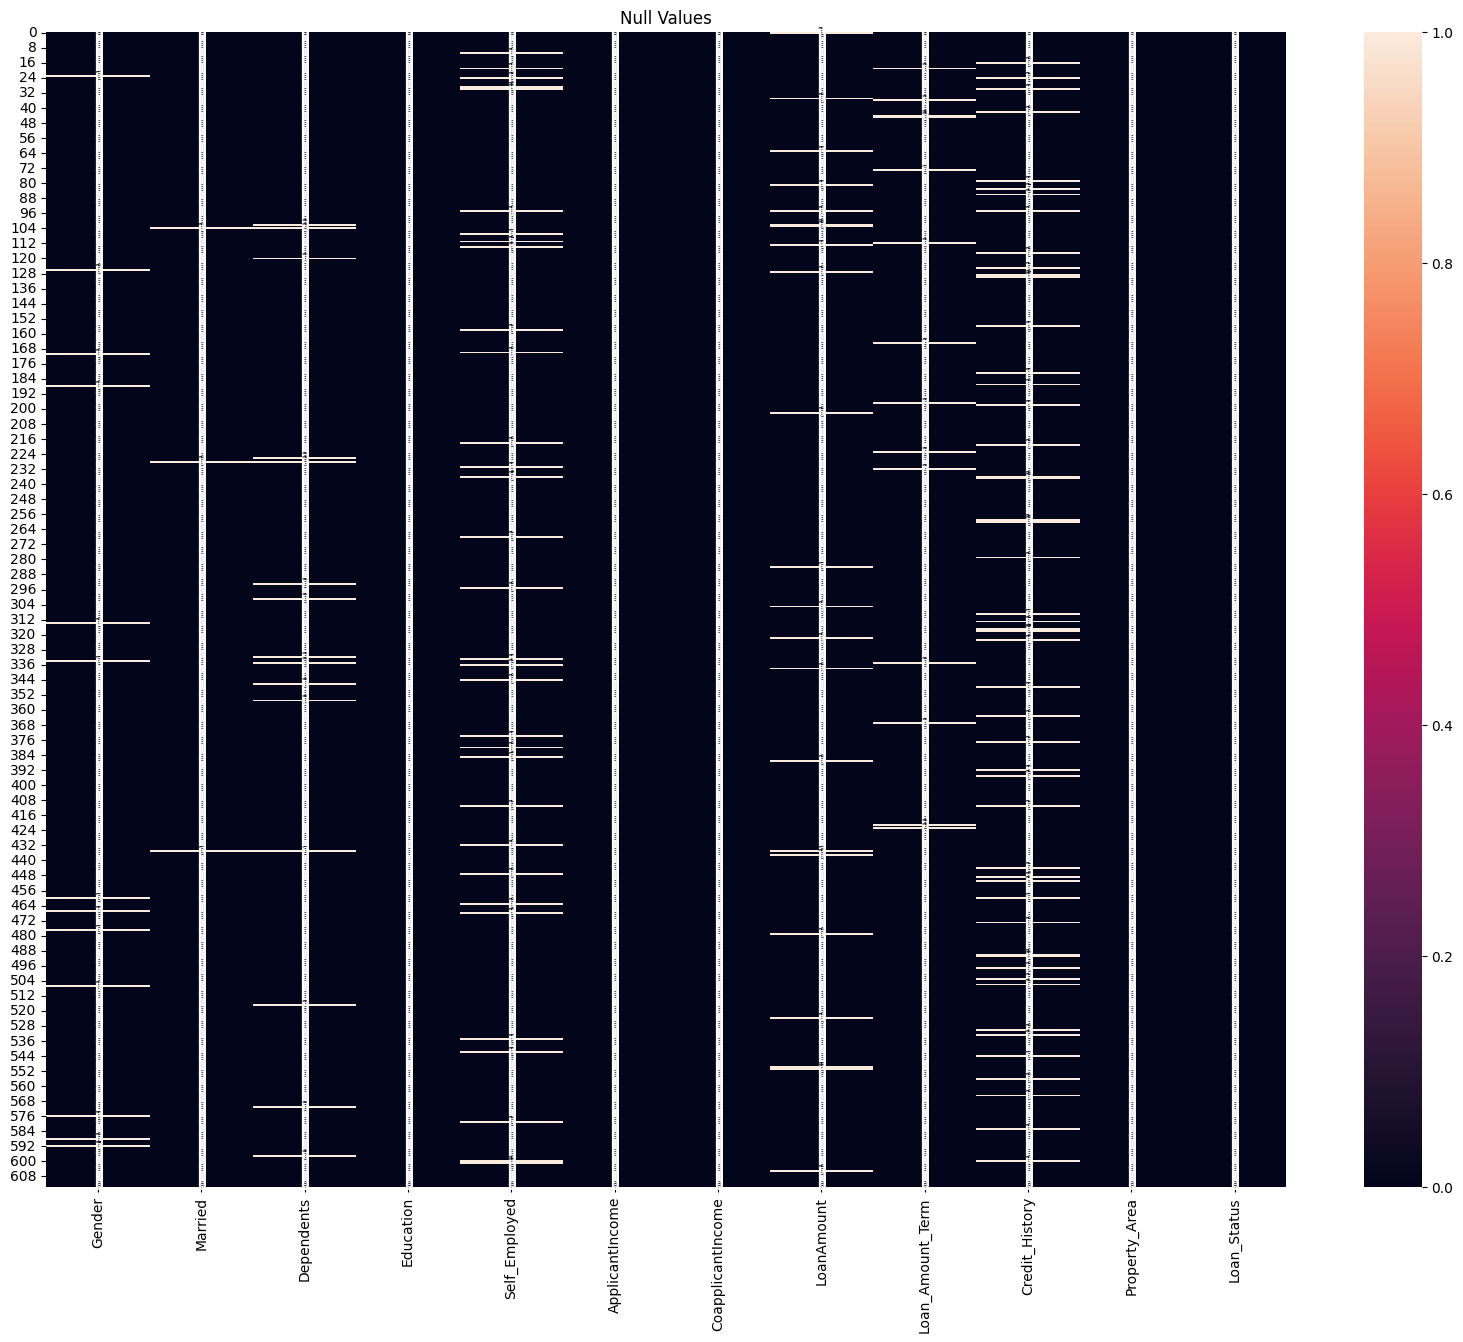

In [8]:
plt.figure(figsize = (20, 15))
sns.heatmap(data.isnull(), annot = True)                           
plt.title('Null Values')
plt.show()

##### Checking the what 3 uniques vlues are there in Credit_History column

In [9]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

##### Data Cleaning: Filling missing values in the dataset

In [10]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

##### Using SimpleImputer to replace replace missing values with the mean value to the numerical column that is LoanAmount and Loan_Amount_Term.

In [11]:
imputer = SimpleImputer(strategy='mean')
to_impute = ['LoanAmount', 'Loan_Amount_Term']
data[to_impute] = imputer.fit_transform(data[to_impute])

##### Checking if any column contains missing values after handling 

In [12]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##### Visualizing the LoanAmount column using histogram to see skewness

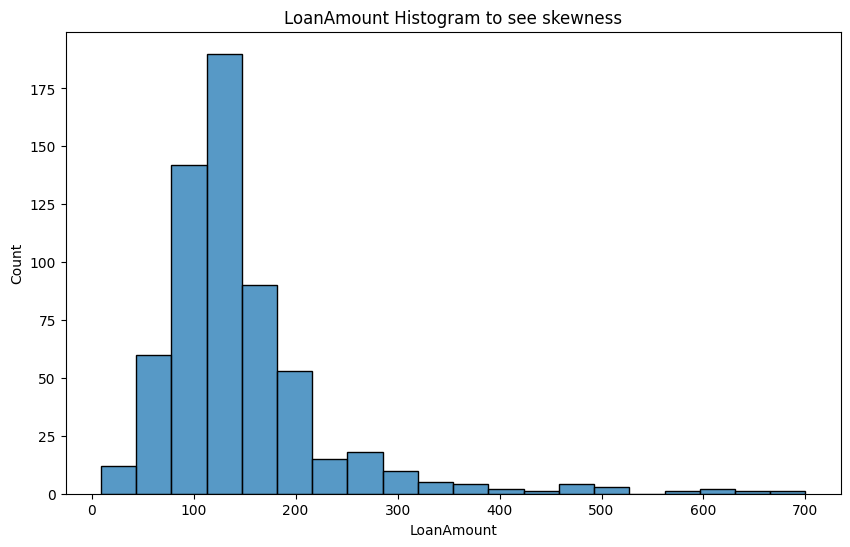

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='LoanAmount', bins=20)
plt.title("LoanAmount Histogram to see skewness")
plt.show()

##### After normalizing the LoanAmount column, visualizing the column using histogram

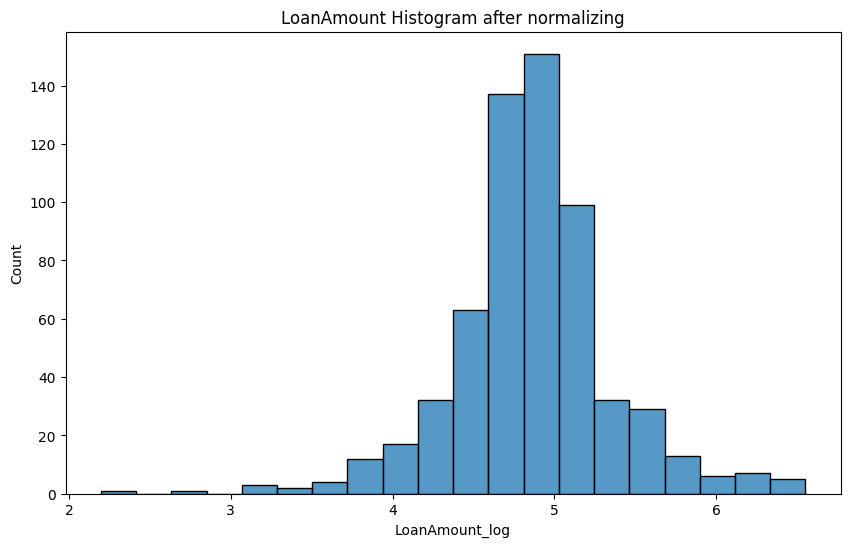

In [14]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='LoanAmount_log', bins=20)
plt.title("LoanAmount Histogram after normalizing")
plt.show()

##### Checking the skewness of the Total_Applicant_Income column

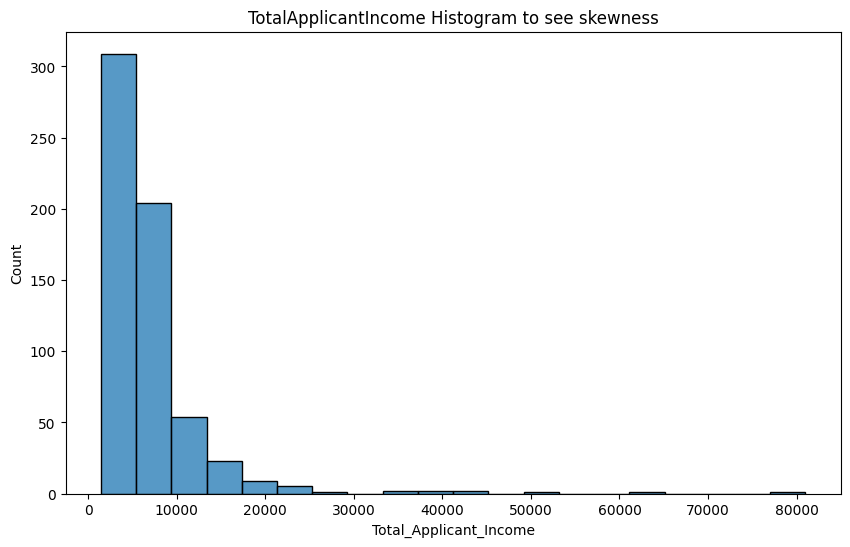

In [15]:
data["Total_Applicant_Income"] = data['ApplicantIncome'] + data['CoapplicantIncome']
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Total_Applicant_Income', bins=20)
plt.title("TotalApplicantIncome Histogram to see skewness")
plt.show()

##### Checking the skewness of the Total_Applicant_Income after normalization

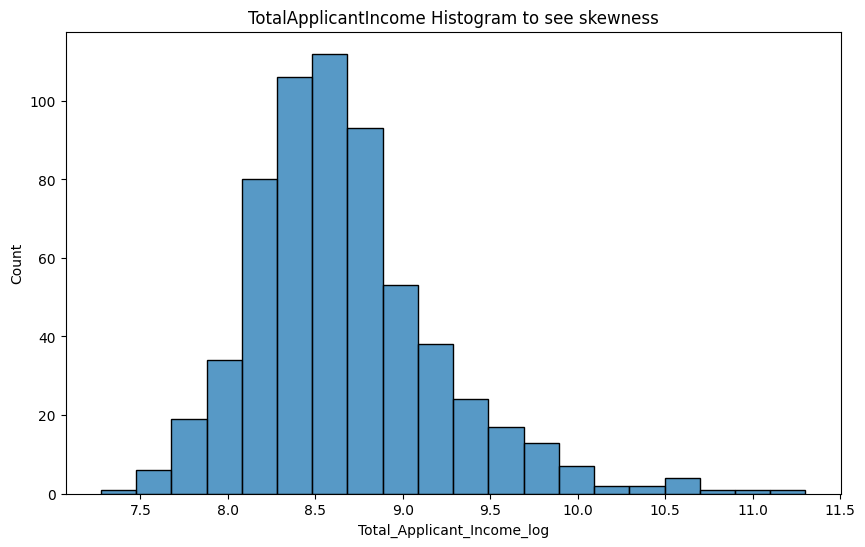

In [16]:
data["Total_Applicant_Income_log"] = np.log(data['Total_Applicant_Income'])
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Total_Applicant_Income_log', bins=20)
plt.title("TotalApplicantIncome Histogram to see skewness")
plt.show()

##### Using violinplot visualizing the income of the applicants based on their education 

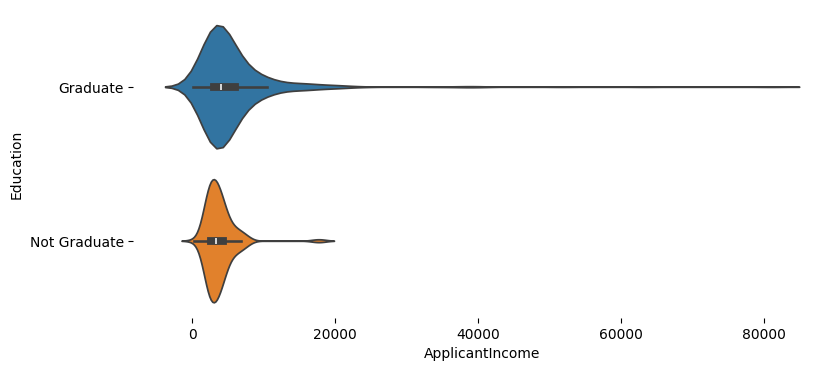

In [17]:
plt.figure(figsize=(9,4))
sns.violinplot(data, x='ApplicantIncome', y='Education', inner='box', hue='Education')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

##### Using countplot visualizing the Loan_Status based on the Credit_History

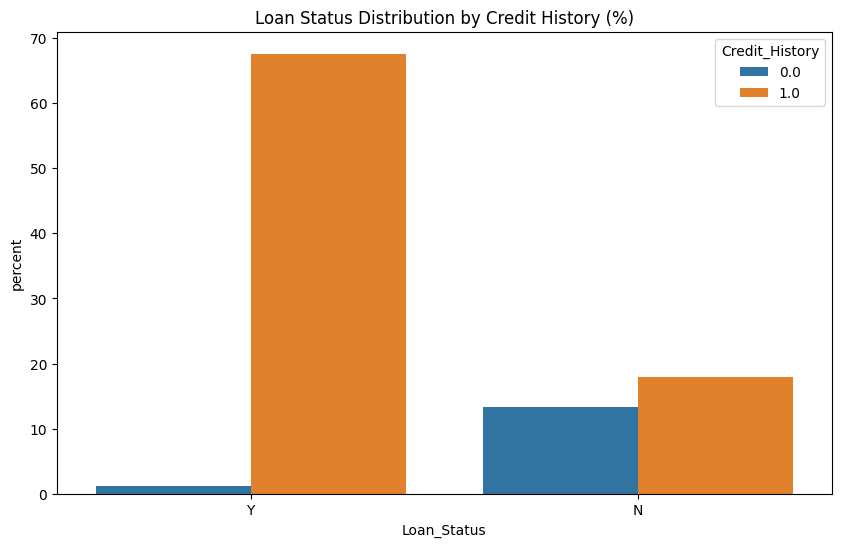

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data, x="Loan_Status", hue="Credit_History", stat="percent")
plt.title('Loan Status Distribution by Credit History (%)')
plt.show()

##### One Hot Encoding is not directly applicable to use on a Series. If we want to apply it, we have to convert the Series to DataFrame or reshape it into a 2D array. Since Loan_Status has only 2 unique values, I'm mapping it to 0 and 1. 

In [19]:
data['Loan_Status'] = data['Loan_Status'].map({'Y':1, 'N':0})

##### Checking columns 

In [20]:
data.columns 

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'Total_Applicant_Income',
       'Total_Applicant_Income_log'],
      dtype='object')

##### Setting the response and explanatory variables also splitting the dataset into training and testing sets

In [21]:
y = data['Loan_Status']
X = data.drop(['Loan_Status'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

##### Seprarating the numerical and categorical columns

In [22]:
categorical_cols = [colname for colname in X_train.columns if X_train[colname].dtype == "object"]
numerical_cols = [colname for colname in X_train.columns if X_train[colname].dtype in ['int64', 'float64']]

##### I'm using **One-hot encoding** that creates new columns indicating the presence (or absence) of each possible value in the original data.  To understand this, we'll work through an example. 

In [23]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

##### Using the **ColumnTransformer** class to bundle together different preprocessing steps. Like numerical_transformer and categorical_transformer.

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

##### Using the **Pipeline** class to define a pipeline that bundles preprocessing and modeling steps. 
#### **Logistic Regression**

In [29]:
model = LogisticRegression(random_state=0)
my_pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
my_pipeline_lr.fit(X_train, y_train)
preds = my_pipeline_lr.predict(X_test)
print('The accuracy of LogisticRegression is: ', metrics.accuracy_score(preds, y_test) * 100)

The accuracy of LogisticRegression is:  83.73983739837398


#### **XGBoostClassifier**

In [30]:
model = XGBClassifier(n_estimators=1200, learning_rate=0.05, n_jobs=4)
my_pipeline_xg = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
my_pipeline_xg.fit(X_train, y_train)
preds = my_pipeline_xg.predict(X_test)
print('The accuracy of XGBoost is: ', metrics.accuracy_score(preds, y_test)*100)

The accuracy of XGBoost is:  82.11382113821138


#### **DecisionTreeClassifier**

In [31]:
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
my_pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
my_pipeline_dt.fit(X_train, y_train)
preds = my_pipeline_dt.predict(X_test)
print('The accuracy of DecisionTree is: ', metrics.accuracy_score(preds, y_test)*100)

The accuracy of DecisionTree is:  71.54471544715447


#### **Random Forest Classifier**

In [32]:
model = RandomForestClassifier(n_estimators=1000, criterion='gini', random_state=0)
my_pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
my_pipeline_rf.fit(X_train, y_train)
preds = my_pipeline_rf.predict(X_test)
print('The accuracy of RandomForest is: ', metrics.accuracy_score(preds, y_test)*100)

The accuracy of RandomForest is:  78.04878048780488
